## Assignment 1 - Classification


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import seaborn as sns


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

In [2]:
df = pd.read_excel('default of credit card clients.xls', skiprows= 1, header = 0)
# rename 'default payment next month' to 'default'
df = df.rename(columns={'default payment next month': 'default'})
#df copy
df_copy = df
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
#print(df.columns)
# check for null values then drop if necessary
df.isnull().sum()
#df.dropna()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

## Question 1
### Data Exploration

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# replace numerical values with string or boolean for clarity
# replace default values from 1 to True and 0 to False
df['default'] = df['default'].astype(bool)
# replace SEX values from 1 to 'male' and 2 to 'female'
df['SEX'] = df['SEX'].map({1: 'male', 2: 'female'})
#df
# replace EDUCATION values from 1 to 'graduate', 2 to 'univsersity', 3 to 'high school', and 4,5, and 6 to 'other'
df['EDUCATION'] = df['EDUCATION'].map({1: 'graduate', 2: 'university', 3: 'high school', 4: 'other', 5: 'other', 6: 'other'})
# replace MARRIAGE values from 1 to 'married', 2 to 'single', 3 to 'other'
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'married', 2: 'single', 3: 'other'})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,True
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,True
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,False
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,False
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,False
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,False
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,True
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,True


## Male vs Female Defaulters

In [6]:
# male data
df_male = df.loc[(df['SEX'] == 'male')]
#df_male
df_male_default = df_male['default']
m_counts = df_male_default.value_counts()
print(m_counts)
print('Total male count =', m_counts[0] + m_counts[1])
print('Percentage of male defaulters =', (m_counts[1] / (m_counts[0] + m_counts[1])) * 100, '%')

False    9015
True     2873
Name: default, dtype: int64
Total male count = 11888
Percentage of male defaulters = 24.16722745625841 %


In [7]:
# female data
df_female = df.loc[(df['SEX'] == 'female')]
df_female_default = df_female['default']
f_counts = df_female_default.value_counts()
print(f_counts)
print('Total female count =', f_counts[0] + f_counts[1])
print('Percentage of female defaulters =', (f_counts[1] / (f_counts[0] + f_counts[1])) * 100, '%')

False    14349
True      3763
Name: default, dtype: int64
Total female count = 18112
Percentage of female defaulters = 20.776280918727917 %


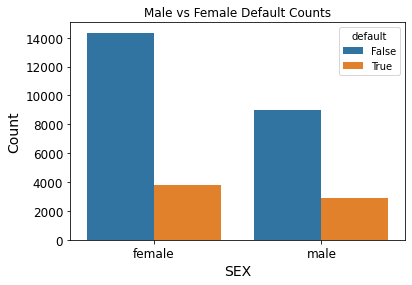

In [8]:
ax = sns.countplot(data = df, x = 'SEX', hue = 'default').set(title = 'Male vs Female Default Counts', ylabel='Count')
#ax
plt.show()

## Analysis
### Male vs Female
When comparing the data of males to females and looking if they will default or not on their next payment, we can see that there are more females than males in the dataset (18112 females compared to 11888 males). However, when observing the data males default more than females, at 24.17% compared to 20.78% for females.

## Defaults based on Education

In [ ]:
# graduate data
df_male = df.loc[(df['SEX'] == 'male')]
#df_male
df_male_default = df_male['default']
m_counts = df_male_default.value_counts()
print(m_counts)
print('Total male count =', m_counts[0] + m_counts[1])
print('Percentage of male defaulters =', (m_counts[1] / (m_counts[0] + m_counts[1])) * 100, '%')

In [28]:
df_ed = df.groupby('EDUCATION')
ed_counts = df_grad['default'].value_counts()
print(ed_counts)

# graduate counts
print('Total graduate count =', ed_counts['graduate'][True] + ed_counts['graduate'][False])
print('Percentage of graduate defaulters =', (ed_counts['graduate'][True] / (ed_counts['graduate'][True] + ed_counts['graduate'][False])) * 100, '%')
# university counts
print('Total university count =', ed_counts['university'][True] + ed_counts['university'][False])
print('Percentage of university defaulters =', (ed_counts['university'][True] / (ed_counts['university'][True] + ed_counts['university'][False])) * 100, '%')

# high school counts
print('Total high school count =', ed_counts['high school'][True] + ed_counts['high school'][False])
print('Percentage of high school defaulters =', (ed_counts['high school'][True] / (ed_counts['high school'][True] + ed_counts['high school'][False])) * 100, '%')

# other counts
print('Total other count =', ed_counts['other'][True] + ed_counts['other'][False])
print('Percentage of other defaulters =', (ed_counts['other'][True] / (ed_counts['other'][True] + ed_counts['other'][False])) * 100, '%')

EDUCATION    default
graduate     False       8549
             True        2036
high school  False       3680
             True        1237
other        False        421
             True          33
university   False      10700
             True        3330
Name: default, dtype: int64
Total graduate count = 10585
Percentage of graduate defaulters = 19.23476617855456 %
Total university count = 14030
Percentage of university defaulters = 23.734853884533145 %
Total high school count = 4917
Percentage of high school defaulters = 25.15761643278422 %
Total other count = 454
Percentage of other defaulters = 7.268722466960352 %


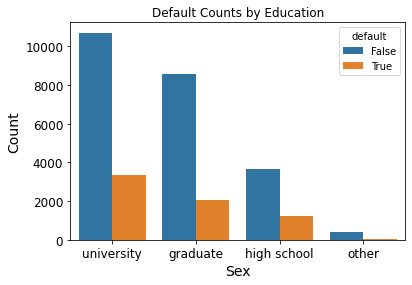

In [9]:
ax = sns.countplot(data = df, x = 'EDUCATION', hue = 'default').set(title = 'Default Counts by Education', xlabel='Sex', ylabel='Count')
plt.show()

## Analysis
### Defaults based on Education
Looking at the data, there are 14,030 university, 10,585 grad, 4917 high school graduates, and 454 others. The percentage of university defaulters is 23.73%, for graduates it is 19.23%, for high school it is 25.16%, and other is 7.27%.

#### Conclusions

Explain your results and choices